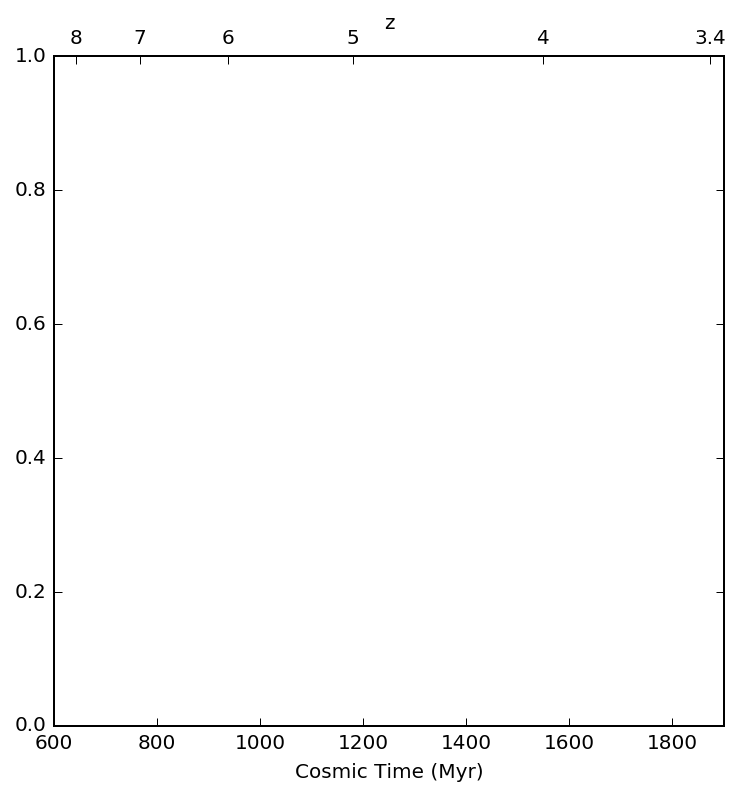

In [10]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']
import numpy as np
import matplotlib.pyplot as plt

def age_Universe(z, H0=68.14, omega_M=0.3036, omega_l=0.6964):
    """
    The age of the Universe in Myr under given cosmology, using equation (3.99) in Mo.'s book.
    Default cosmological parameters are from most recent WMAP result.
    """
    H0_inverse = 9.78e5/H0 # (1Mpc s)/km~9.78e5 Myr
    f1 = 2./3./np.sqrt(omega_l)
    f2 = np.log( ( np.sqrt(omega_l/(1.+z)**3)+np.sqrt(omega_l/(1.+z)**3+omega_M) ) / np.sqrt(omega_M) )
    return H0_inverse*f1*f2

fig, ax1 = plt.subplots()
fig.set_size_inches([6,6])
ax1.set_xlabel('Cosmic Time (Myr)')

ax1.set_xlim(600,1900)

x_min, x_max = ax1.get_xlim()
ax3 = ax1.twiny()
ax3.set_xlim(x_min, x_max)
redshift_ticks = np.array(['3.4','4','5','6','7','8'])
new_tick_locations = np.array([age_Universe(float(z)) for z in redshift_ticks])
# Select valid ticks for the second axis to plot, otherwise invalid values will mess up the plot
valid_index = (new_tick_locations>x_min) & (new_tick_locations<x_max)

ax3.set_xlabel('z',labelpad=0)
ax3.set_xticks(new_tick_locations[valid_index])
ax3.set_xticklabels(redshift_ticks[valid_index])
fig.show()